In [50]:
pwd

'/home/jslee/mam/mammo_code'

In [2]:
import pandas as pd
from glob import glob
import re
import random
import numpy as np
import function as f

### DENSITY

In [3]:
segs = sorted(glob("numpy/segment_256x256/*/*"))
images = sorted(glob("numpy/image_256x256/*/*"))

In [4]:
print(len(segs))
print(len(images))

14069
43532


In [5]:
# segs가 있는 14069개에 대하여 정보 합치기

In [6]:
df = pd.DataFrame(segs,columns=['file_image'])
df.file_image.tolist()[0]

'numpy/segment_256x256/asan/10512416_RCC_20070829.npy'

In [7]:
df = pd.DataFrame(segs,columns=['file_image'])
df['file'] = [re.sub('.npy','.dcm',i.split("/")[3]) for i in df.file_image.tolist()]
df['CENTER'] = [re.sub('.npy','.dcm',i.split("/")[2]) for i in df.file_image.tolist()]
df["ID"] = [i.split("_")[0] for i in df.file]
df["SIDE"] = [i.split("_")[1] for i in df.file]

In [8]:
df.SIDE[0]

'RCC'

In [9]:
meta_total = pd.read_csv("csv/meta.csv")

In [10]:
meta_total.loc[[i in ['LCC',"1","CCL","L"] for i in meta_total.SIDE_case],"SIDE_case"] = "LCC"
meta_total.loc[[i in ['RCC',"0","CCR","R"] for i in meta_total.SIDE_case],"SIDE_case"] = "RCC"

In [11]:
tmp = meta_total.value_counts(["ID","CENTER"])
tmp = tmp[tmp==1].index.values

In [12]:
meta_total = pd.DataFrame(zip([i[0] for i in tmp], [i[1] for i in tmp]), columns=["ID","CENTER"]).merge(meta_total)

In [13]:
df = df.merge(meta_total)

#### Select participants who have both LR

In [14]:
# control

In [15]:
tmp = df[df.GROUP=="control"].value_counts(["CENTER","ID"])
df_control1 = tmp[tmp==1].index.values # 한쪽만 있는 경우
df_control2 = tmp[tmp!=1].index.values # 1쪽 이상 있는 경우

In [16]:
df_control1 = pd.DataFrame(zip([i[0] for i in df_control1], [i[1] for i in df_control1]), columns=["CENTER","ID"])
df_control2 = pd.DataFrame(zip([i[0] for i in df_control2], [i[1] for i in df_control2]), columns=["CENTER","ID"])

In [17]:
# 1쪽 이상 있는 경우, 1쪽 랜덤 선택
df_control2['SIDE'] = [random.choice(['LCC','RCC']) for i in range(len(df_control2))]

In [18]:
df_control = pd.concat([df_control1.merge(df),df_control2.merge(df)])

In [19]:
df_case = df[df.GROUP=="case"]
df_case = df_case[(df_case.SIDE != df_case.SIDE_case) & (df_case.SIDE_case!="BOTH")]

In [20]:
df_density = pd.concat([df_control, df_case]).reset_index(drop=True)

In [21]:
list_density = df_density.file_image.tolist()
len(list_density)

8082

In [22]:
df_density.value_counts("GROUP")

GROUP
control    5859
case       2223
dtype: int64

### IMAGE

In [23]:
list_images = sorted(glob("numpy/image_256x256/*/*"))
len(list_images)

43532

In [24]:
# 위와 동일

In [25]:
df = pd.DataFrame(list_images,columns=['file_image'])
df['file'] = [re.sub('.npy','.dcm',i.split("/")[3]) for i in df.file_image.tolist()]
df['CENTER'] = [re.sub('.npy','.dcm',i.split("/")[2]) for i in df.file_image.tolist()]
df["ID"] = [i.split("_")[0] for i in df.file]
df["SIDE"] = [i.split("_")[1] for i in df.file]
df["DATE"] = [i.split("_")[2] for i in df.file]

In [26]:
meta_total.loc[[i in ['LCC',"1","CCL","L"] for i in meta_total.SIDE_case],"SIDE_case"] = "LCC"
meta_total.loc[[i in ['RCC',"0","CCR","R"] for i in meta_total.SIDE_case],"SIDE_case"] = "RCC"

In [27]:
tmp = meta_total.value_counts(["ID","CENTER"])
tmp = tmp[tmp==1].index.values

In [28]:
meta_total = pd.DataFrame(zip([i[0] for i in tmp], [i[1] for i in tmp]), columns=["ID","CENTER"]).merge(meta_total)

In [29]:
df = df.merge(meta_total)

In [30]:
tmp = df[df.GROUP=="control"].value_counts(["CENTER","ID"])
df_control1 = tmp[tmp==1].index.values
df_control2 = tmp[tmp!=1].index.values

In [31]:
df_control1 = pd.DataFrame(zip([i[0] for i in df_control1], [i[1] for i in df_control1]), columns=["CENTER","ID"])
df_control2 = pd.DataFrame(zip([i[0] for i in df_control2], [i[1] for i in df_control2]), columns=["CENTER","ID"])

In [32]:
df_control2['SIDE'] = [random.choice(['LCC','RCC']) for i in range(len(df_control2))]

In [33]:
df_control = pd.concat([df_control1.merge(df),df_control2.merge(df)])

In [34]:
df_case = df[df.GROUP=="case"]

In [35]:
# case이지만 발병 위치 알 수 없는 데이터 1627건 있음

In [36]:
df_case[pd.isna(df_case.SIDE_case)] # NO SIDE_CASES

,file_image,file,CENTER,ID,SIDE,DATE,GROUP,AGE,BMI,SIDE_case
6631,numpy/image_256x256/ncc2018/18268225_LCC_20170...,18268225_LCC_20170222.dcm,ncc2018,18268225,LCC,20170222.dcm,case,71.0,NaN,NaN
6632,numpy/image_256x256/ncc2018/18268225_RCC_20170...,18268225_RCC_20170222.dcm,ncc2018,18268225,RCC,20170222.dcm,case,71.0,NaN,NaN
6660,numpy/image_256x256/ncc2018/20065760_LCC_20160...,20065760_LCC_20160629.dcm,ncc2018,20065760,LCC,20160629.dcm,case,64.0,NaN,NaN
6661,numpy/image_256x256/ncc2018/20065760_RCC_20160...,20065760_RCC_20160629.dcm,ncc2018,20065760,RCC,20160629.dcm,case,64.0,NaN,NaN
6680,numpy/image_256x256/ncc2018/20105978_LCC_20160...,20105978_LCC_20160324.dcm,ncc2018,20105978,LCC,20160324.dcm,case,52.0,23.147255121330193,NaN
...,...,...,...,...,...,...,...,...,...,...
32878,numpy/image_256x256/twin/E1006881_LCC_20060913...,E1006881_LCC_20060913.dcm,twin,E1006881,LCC,20060913.dcm,case,63.0,25.6,NaN
33331,numpy/image_256x256/twin/E1012561_LCC_20070704...,E1012561_LCC_20070704.dcm,twin,E1012561,LCC,20070704.dcm,case,62.0,22.95,NaN
33332,numpy/image_256x256/twin/E1012561_RCC_20070704...,E1012561_RCC_20070704.dcm,twin,E1012561,RCC,20070704.dcm,case,62.0,22.95,NaN
33552,numpy/image_256x256/twin/E1014580_LCC_20070918...,E1014580_LCC_20070918.dcm,twin,E1014580,LCC,20070918.dcm,case,56.0,23.91,NaN


In [37]:
df_case = df_case[(df_case.SIDE != df_case.SIDE_case) & (df_case.SIDE_case!="BOTH") & ~pd.isna(df_case.SIDE_case)]

In [38]:
df_image = pd.concat([df_control, df_case]).reset_index(drop=True)

In [39]:
df_image = df_image[(df_image.SIDE == "LCC") | (df_image.SIDE == "RCC")]

In [40]:
df_image

,CENTER,ID,file_image,file,SIDE,DATE,GROUP,AGE,BMI,SIDE_case
0,asan,33251808,numpy/image_256x256/asan/33251808_LCC_20070920...,33251808_LCC_20070920.dcm,LCC,20070920.dcm,control,43.0,19.593,NaN
1,samsung,08014619,numpy/image_256x256/samsung/08014619_RCC_20110...,08014619_RCC_20110118.dcm,RCC,20110118.dcm,control,62.0,21.3,NaN
2,samsung,08187700,numpy/image_256x256/samsung/08187700_LCC_20080...,08187700_LCC_20080117.dcm,LCC,20080117.dcm,control,53.0,27.9,NaN
3,samsung,15883336,numpy/image_256x256/samsung/15883336_LCC_20070...,15883336_LCC_20070117.dcm,LCC,20070117.dcm,control,57.0,24.6,NaN
4,samsung,15673108,numpy/image_256x256/samsung/15673108_LCC_20070...,15673108_LCC_20070816.dcm,LCC,20070816.dcm,control,47.0,20.2,NaN
...,...,...,...,...,...,...,...,...,...,...
13502,samsung,31153132,numpy/image_256x256/samsung/31153132_RCC_20130...,31153132_RCC_20130806.dcm,RCC,20130806.dcm,case,45.0,27.0,LCC
13503,samsung,31219355,numpy/image_256x256/samsung/31219355_RCC_20130...,31219355_RCC_20130821.dcm,RCC,20130821.dcm,case,42.0,21.7,LCC
13504,samsung,31221853,numpy/image_256x256/samsung/31221853_LCC_20130...,31221853_LCC_20130820.dcm,LCC,20130820.dcm,case,45.0,21.0,RCC
13505,samsung,31239791,numpy/image_256x256/samsung/31239791_LCC_20130...,31239791_LCC_20130822.dcm,LCC,20130822.dcm,case,41.0,19.5,RCC


In [41]:
df_image.value_counts("GROUP")

GROUP
control    10830
case        2667
dtype: int64

In [96]:
df_image.value_counts("CENTER")

CENTER
ncc2020    14962
samsung     6797
ncc2018     3952
asan        3483
brmh        2833
twin        1796
ilsan        295
dtype: int64

### SPLIT

In [42]:
random.seed(92)
n_density = len(df_density)
list_index = list(range(n_density))
random.shuffle(list_index)

In [43]:
p_split = [0.7,0.1,0.1,0.1]
p1 = p_split[0]
p2 = p_split[0]+p_split[1]
p3 = (p_split[0]+p_split[1]+p_split[2])
index_train = list_index[:int(n_density*p1)]
index_val = list_index[int(n_density*p1):int(n_density*p2)]
index_test = list_index[int(n_density*p2):int(n_density*p3)]
index_cal = list_index[int(n_density*p3):]

In [44]:
df_density["dataset"] = ""
df_density.loc[index_train,"dataset"] = "train"
df_density.loc[index_val,"dataset"] = "val"
df_density.loc[index_test,"dataset"] = "test"
df_density.loc[index_cal,"dataset"] = "cal"

In [45]:
df_density.value_counts("dataset")

dataset
train    5657
cal       809
test      808
val       808
dtype: int64

In [52]:
df_image = df_density[['ID','CENTER','dataset']].merge(df_image,how='right')

In [61]:
tmp = df_image.value_counts(["CENTER","ID","DATE"]).index.values
tmp = pd.DataFrame(zip([i[0] for i in tmp], [i[1] for i in tmp], [i[2] for i in tmp]),columns=["CENTER","ID","DATE"]).value_counts(["CENTER","ID"])

## 1시점만 있는 경우 vs follow-up 있는 경우


In [62]:
len(tmp)

11665

In [63]:
# 1시점만 있는 경우 vs follow-up 있는 경우
df_image_1 = tmp[tmp==1].index.values.tolist() # select only 1 point image (no follow-ups)
df_image_multi = tmp[tmp!=1].index.values.tolist() # select follow-ups

In [64]:
print(len(df_image_1))
print(len(df_image_multi))

10684
981


In [65]:
df_image_1 = pd.DataFrame(zip([i[0] for i in df_image_1], [i[1] for i in df_image_1]),columns=['CENTER','ID'])
df_image_multi = pd.DataFrame(zip([i[0] for i in df_image_multi], [i[1] for i in df_image_multi]),columns=['CENTER','ID'])
df_image_multi['follow-up'] = 'follow-up'

In [66]:
df_image = pd.concat([df_image_1,df_image_multi]).merge(df_image)
df_image.loc[df_image["follow-up"]=="follow-up","dataset"] = "follow-up"

In [67]:
del df_image['follow-up']

In [68]:
df_image

,CENTER,ID,dataset,file_image,file,SIDE,DATE,GROUP,AGE,BMI,SIDE_case
0,ncc2020,24356,cal,numpy/image_256x256/ncc2020/24356_RCC_19000101...,24356_RCC_19000101.dcm,RCC,19000101.dcm,control,44.0,NaN,NaN
1,ncc2020,24234,train,numpy/image_256x256/ncc2020/24234_LCC_19000101...,24234_LCC_19000101.dcm,LCC,19000101.dcm,control,62.0,NaN,NaN
2,ncc2020,24243,train,numpy/image_256x256/ncc2020/24243_RCC_19000101...,24243_RCC_19000101.dcm,RCC,19000101.dcm,control,52.0,NaN,NaN
3,ncc2020,24205,train,numpy/image_256x256/ncc2020/24205_LCC_19000101...,24205_LCC_19000101.dcm,LCC,19000101.dcm,control,58.0,NaN,NaN
4,ncc2020,24204,train,numpy/image_256x256/ncc2020/24204_RCC_19000101...,24204_RCC_19000101.dcm,RCC,19000101.dcm,control,46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13492,twin,E1006711,follow-up,numpy/image_256x256/twin/E1006711_LCC_20120831...,E1006711_LCC_20120831.dcm,LCC,20120831.dcm,control,43.0,25.7,NaN
13493,twin,E1006720,follow-up,numpy/image_256x256/twin/E1006720_RCC_20060908...,E1006720_RCC_20060908.dcm,RCC,20060908.dcm,control,38.0,25.42,NaN
13494,twin,E1006720,follow-up,numpy/image_256x256/twin/E1006720_RCC_20120831...,E1006720_RCC_20120831.dcm,RCC,20120831.dcm,control,38.0,25.42,NaN
13495,twin,E1006830,follow-up,numpy/image_256x256/twin/E1006830_RCC_20060912...,E1006830_RCC_20060912.dcm,RCC,20060912.dcm,control,46.0,21.68,NaN


In [69]:
df_image1 = df_image[~pd.isna(df_image.dataset)]
df_image2 = df_image[pd.isna(df_image.dataset)].reset_index(drop=True)

In [70]:
df_image1

,CENTER,ID,dataset,file_image,file,SIDE,DATE,GROUP,AGE,BMI,SIDE_case
0,ncc2020,24356,cal,numpy/image_256x256/ncc2020/24356_RCC_19000101...,24356_RCC_19000101.dcm,RCC,19000101.dcm,control,44.0,NaN,NaN
1,ncc2020,24234,train,numpy/image_256x256/ncc2020/24234_LCC_19000101...,24234_LCC_19000101.dcm,LCC,19000101.dcm,control,62.0,NaN,NaN
2,ncc2020,24243,train,numpy/image_256x256/ncc2020/24243_RCC_19000101...,24243_RCC_19000101.dcm,RCC,19000101.dcm,control,52.0,NaN,NaN
3,ncc2020,24205,train,numpy/image_256x256/ncc2020/24205_LCC_19000101...,24205_LCC_19000101.dcm,LCC,19000101.dcm,control,58.0,NaN,NaN
4,ncc2020,24204,train,numpy/image_256x256/ncc2020/24204_RCC_19000101...,24204_RCC_19000101.dcm,RCC,19000101.dcm,control,46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13492,twin,E1006711,follow-up,numpy/image_256x256/twin/E1006711_LCC_20120831...,E1006711_LCC_20120831.dcm,LCC,20120831.dcm,control,43.0,25.7,NaN
13493,twin,E1006720,follow-up,numpy/image_256x256/twin/E1006720_RCC_20060908...,E1006720_RCC_20060908.dcm,RCC,20060908.dcm,control,38.0,25.42,NaN
13494,twin,E1006720,follow-up,numpy/image_256x256/twin/E1006720_RCC_20120831...,E1006720_RCC_20120831.dcm,RCC,20120831.dcm,control,38.0,25.42,NaN
13495,twin,E1006830,follow-up,numpy/image_256x256/twin/E1006830_RCC_20060912...,E1006830_RCC_20060912.dcm,RCC,20060912.dcm,control,46.0,21.68,NaN


In [71]:
#random.seed(92)
n_density = len(df_image2)
list_index = list(range(n_density))
random.shuffle(list_index)

In [72]:
p_split = [0.7,0.1,0.1,0.1]
p1 = p_split[0]
p2 = p_split[0]+p_split[1]
p3 = (p_split[0]+p_split[1]+p_split[2])
index_train = list_index[:int(n_density*p1)]
index_val = list_index[int(n_density*p1):int(n_density*p2)]
index_test = list_index[int(n_density*p2):int(n_density*p3)]
index_cal = list_index[int(n_density*p3):]

In [73]:
df_image2["dataset"] = ""
df_image2.loc[index_train,"dataset"] = "train"
df_image2.loc[index_val,"dataset"] = "val"
df_image2.loc[index_test,"dataset"] = "test"
df_image2.loc[index_cal,"dataset"] = "cal"

In [74]:
df_image2.value_counts("dataset")

dataset
train    1821
cal       261
test      260
val       260
dtype: int64

In [75]:
df_image = pd.concat([df_image1,df_image2])
df_image = df_image[['CENTER','ID','dataset','file']].drop_duplicates().merge(df,how='right')

In [76]:
tmp = df_image[~pd.isna(df_image.dataset)][['CENTER','ID','dataset']].drop_duplicates()
tmp['ID_tmp'] = tmp.CENTER + tmp.ID

In [77]:
tmp.value_counts("dataset")

dataset
train        7478
cal          1070
test         1068
val          1068
follow-up     981
dtype: int64

In [78]:
df_image_use = df_image[~pd.isna(df_image.dataset)].copy()
df_image_other = df_image[pd.isna(df_image.dataset)].copy()
df_image_other.loc[:,'ID_tmp'] = df_image_other.CENTER + df_image_other.ID
del df_image_other['dataset']

In [79]:
df_image_other = df_image_other.merge(tmp,how='left')
df_image_other.loc[pd.isna(df_image_other.dataset),"dataset"] = "NONE"
del df_image_other['ID_tmp']

In [80]:
df_image_use['dataset_image'] = "yes"
df_image_other['dataset_image'] = "no"
df_image = pd.concat([df_image_use,df_image_other])

In [81]:
df_image.value_counts("dataset_image")

dataset_image
no     20621
yes    13497
dtype: int64

In [82]:
df_image['dataset_density'] = "no"
tmp = df_density.file.tolist()
df_image.loc[[i in tmp for i in df_image.file],"dataset_density"] = "yes"

In [83]:
df_image = df_image[['dataset','dataset_density','dataset_image','file_image','file','CENTER','ID','DATE','SIDE','SIDE_case','GROUP','AGE','BMI']]

In [84]:
df_image

,dataset,dataset_density,dataset_image,file_image,file,CENTER,ID,DATE,SIDE,SIDE_case,GROUP,AGE,BMI
0,train,no,yes,numpy/image_256x256/asan/10512416_LCC_20070829...,10512416_LCC_20070829.dcm,asan,10512416,20070829.dcm,LCC,NaN,control,44.0,20.82
2,val,yes,yes,numpy/image_256x256/asan/10516254_LCC_20080709...,10516254_LCC_20080709.dcm,asan,10516254,20080709.dcm,LCC,RCC,case,48.0,23.74
3,train,no,yes,numpy/image_256x256/asan/10531695_LCC_20090205...,10531695_LCC_20090205.dcm,asan,10531695,20090205.dcm,LCC,NaN,control,55.0,21.841
5,train,yes,yes,numpy/image_256x256/asan/10531811_LCC_20080218...,10531811_LCC_20080218.dcm,asan,10531811,20080218.dcm,LCC,RCC,case,52.0,28.76
6,train,yes,yes,numpy/image_256x256/asan/10532852_LCC_20071214...,10532852_LCC_20071214.dcm,asan,10532852,20071214.dcm,LCC,NaN,control,49.0,19.453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20616,train,no,no,numpy/image_256x256/twin/E2004740_RCC_20071024...,E2004740_RCC_20071024.dcm,twin,E2004740,20071024.dcm,RCC,NaN,control,37.0,28.25
20617,train,no,no,numpy/image_256x256/twin/E2004750_RCC_20071024...,E2004750_RCC_20071024.dcm,twin,E2004750,20071024.dcm,RCC,NaN,control,37.0,24.41
20618,test,no,no,numpy/image_256x256/twin/E2004770_LCC_20071024...,E2004770_LCC_20071024.dcm,twin,E2004770,20071024.dcm,LCC,NaN,control,35.0,21.84
20619,train,no,no,numpy/image_256x256/twin/E2004780_RCC_20071024...,E2004780_RCC_20071024.dcm,twin,E2004780,20071024.dcm,RCC,NaN,control,35.0,23.13


In [85]:
df_image.value_counts(["dataset_density","dataset_image","CENTER"])

dataset_density  dataset_image  CENTER 
no               no             ncc2020    6756
yes              yes            ncc2020    3752
no               yes            samsung    3562
                 no             samsung    3235
                                ncc2018    3147
                                brmh       2833
yes              no             ncc2020    2227
no               yes            ncc2020    2227
yes              yes            asan       1424
no               no             twin        900
                 yes            twin        896
                                ncc2018     805
                 no             asan        697
                 yes            asan        683
yes              no             asan        679
no               yes            ilsan       148
                 no             ilsan       147
dtype: int64

In [86]:
df_image[(df_image.dataset_image=="yes") & (df_image.dataset=="train")].value_counts(["CENTER","GROUP"])

CENTER   GROUP  
ncc2020  control    3139
         case       1017
asan     control     980
ncc2018  control     553
asan     case        523
twin     control     468
samsung  control     418
         case        277
ilsan    control      79
         case         24
dtype: int64

In [87]:
df_image[(df_image.dataset_density=="yes") & (df_image.dataset=="train")].value_counts(["CENTER","GROUP"])

CENTER   GROUP  
ncc2020  control    3139
         case       1017
asan     control     978
         case        523
dtype: int64

In [88]:
df_image.value_counts("CENTER")

CENTER
ncc2020    14962
samsung     6797
ncc2018     3952
asan        3483
brmh        2833
twin        1796
ilsan        295
dtype: int64

In [94]:
len(df_image) #34118

34118

In [89]:
df_image.value_counts("dataset")

dataset
train        14006
NONE          8465
follow-up     5623
cal           2011
test          2010
val           2003
dtype: int64

In [95]:
df_image.to_csv("csv/train.csv", index=False)

In [90]:
import getfinal as f

In [91]:
i=0
file = 'dicom/'+df.CENTER[i]+'/'+ df.file[i]
print(file)
dicom = f.get_dicom(file)
final = f.get_final5(file)
image = np.load(df.file_image[i])

dicom/asan/10512416_LCC_20070829.dcm


numpy/image_256x256/ncc2020/24239_RCC_19000101.npy


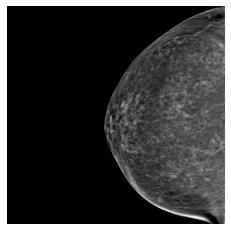

In [93]:
i = random.choice(range(len(list_images)))
file = df.loc[i,"file_image"]
print(file)
f.p(np.load(file))